In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf 
from PIL import Image 
import os
from skimage import color
from skimage import io
import skimage
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelBinarizer 
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import random

In [2]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        

# Any results you write to the current directory are saved as output.

In [3]:
imagelist=[]
classname=[]
numclass=-1
imagelist1=[]
imagelist2=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        try:
            img = mpimg.imread(os.path.join(dirname, filename)).astype('float32') / 255
            imagelist1.append(dirname[2:])
            imagelist2.append(os.path.join(dirname, filename))
            if dirname not in classname:
                classname.append(dirname)
                imagelist.append([os.path.join(dirname, filename)])
                numclass+=1
            else:
                imagelist[numclass].append(os.path.join(dirname, filename))
        except:
            pass

In [4]:
imagedata = []
for i in range(0,len(imagelist2)):
    img = mpimg.imread(imagelist2[i]).astype('float32') / 255
    img = resize(img, (128,128,3))
    imagedata.append(img)

In [5]:
lb = LabelBinarizer()

imagelist1 = np.array(imagelist1)
imagelist1 = lb.fit_transform(imagelist1)
imagedata = np.array(imagedata)
print(imagedata.shape)

(6818, 128, 128, 3)


In [6]:
image_train, image_test, label_train, label_test = train_test_split(imagedata, imagelist1, test_size=0.2, random_state=5)
print(image_train.shape)
print(label_train.shape)
print(image_test.shape)
print(label_test.shape)

(5454, 128, 128, 3)
(5454, 150)
(1364, 128, 128, 3)
(1364, 150)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(150, activation='sigmoid'),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [9]:
model.compile(optimizer = 'Adadelta' , loss = tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(image_train, label_train, epochs=500, validation_data=(image_test, label_test))

Train on 5454 samples, validate on 1364 samples
Epoch 1/500
5454/5454 [==============================] - 57s 11ms/sample - loss: 5.0114 - accuracy: 0.0059 - val_loss: 5.0098 - val_accuracy: 0.0073
Epoch 2/500
5454/5454 [==============================] - 56s 10ms/sample - loss: 5.0108 - accuracy: 0.0077 - val_loss: 5.0095 - val_accuracy: 0.0088
Epoch 3/500
5454/5454 [==============================] - 58s 11ms/sample - loss: 5.0102 - accuracy: 0.0090 - val_loss: 5.0092 - val_accuracy: 0.0088
Epoch 4/500
5454/5454 [==============================] - 56s 10ms/sample - loss: 5.0097 - accuracy: 0.0094 - val_loss: 5.0089 - val_accuracy: 0.0095
Epoch 5/500
5454/5454 [==============================] - 57s 10ms/sample - loss: 5.0092 - accuracy: 0.0095 - val_loss: 5.0086 - val_accuracy: 0.0095
Epoch 6/500
5454/5454 [==============================] - 57s 10ms/sample - loss: 5.0086 - accuracy: 0.0097 - val_loss: 5.0083 - val_accuracy: 0.0095
Epoch 7/500
5454/5454 [==============================] - 6

1364/1364 - 3s - loss: 3.2582 - accuracy: 0.3218


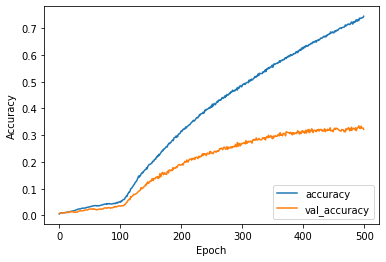

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(image_test,  label_test, verbose=2)

In [11]:
print(test_acc)

0.3218475
